In [1]:
# Core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Google Colab
from google.colab import drive

# PyTorch is not used in the provided code, so it has been removed

# Sklearn imports
from sklearn.metrics import confusion_matrix

# IPython utilities
from IPython.display import clear_output

In [2]:
#Mount Drive

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

drive.mount('/content/drive')

Mounted at /content/drive


**Helper Functions**

In [54]:
def createHistogram(axis, values, title, bins, xLabel, yLabel):
  axis.hist(values, bins=bins, color='blue', alpha=0.7)
  axis.set_title(title)
  axis.set_xlabel(xLabel)
  axis.set_ylabel(yLabel)
  axis.grid(True)


def createPieChart(axis, title, labels, values, explode=None):
  colors = ['gold', 'lightblue']

  # set exist settings
  axis.set_aspect('equal')
  axis.set_title(title)

  # Plot
  axis.pie(values, explode=explode, labels=labels, colors=colors,
          autopct='%1.1f%%', shadow=True, startangle=140)

def createLinePlot(axis, values, title, xLabel, yLabel):
   axis.plot(values, label='row')
   axis.set_title(title)
   axis.set_xlabel(xLabel)
   axis.set_ylabel(yLabel)
   axis.grid(True)

**Visualizations**

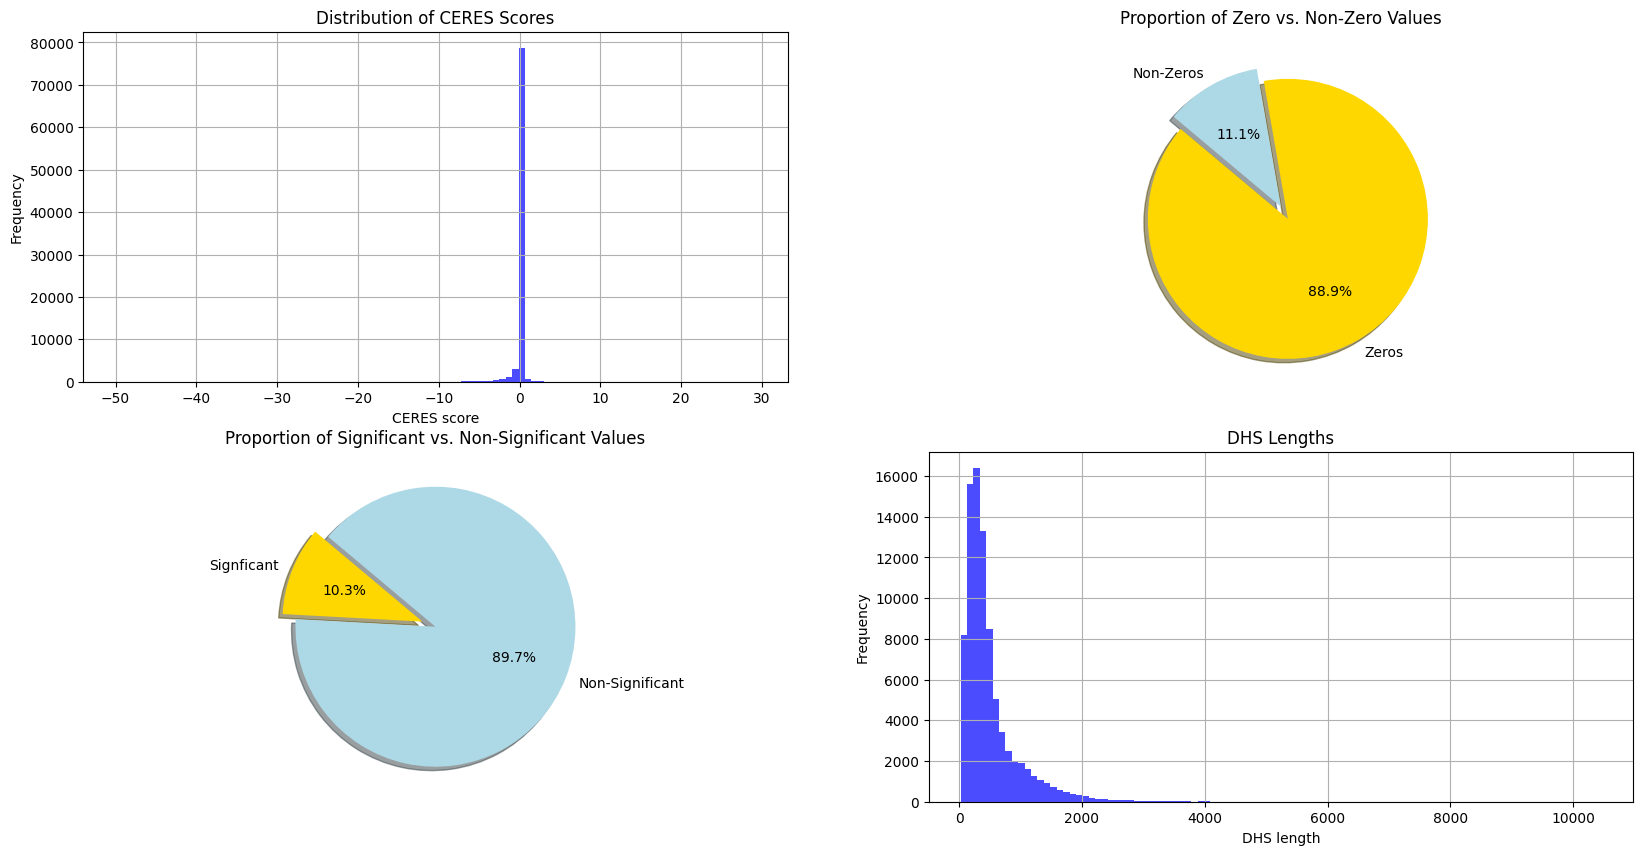

In [ ]:
k562_df = pd.read_csv('/content/drive/My Drive/CERES.csv').reset_index(drop=True).astype('float32')

# Set up the figure and axes
fig, axes = plt.subplots(2, 2, figsize=(20, 10))  # 1 row, 2 columns


# Get all CERES scores
ceres_scores = k562_df['wgCERES_score'];

createHistogram(
    axes[0,0],
    ceres_scores,
    'Distribution of CERES Scores',
    100,
    'CERES score',
    'Frequency',
)

# Count zeros and non-zeros for the pie chart
zero_count = np.sum(k562_df['wgCERES_score'] == 0)
non_zero_count = len(k562_df['wgCERES_score']) - zero_count

createPieChart(
    axes[0, 1],
    'Proportion of Zero vs. Non-Zero Values',
    ['Zeros', 'Non-Zeros'],
    [zero_count, non_zero_count],
    [0.1, 0]
)

# Count significant and non-significant DHSs
signficiant_dhs = len(k562_df['dhs_0_1_wg']) - zero_count
non_signficiant_dhs = np.sum(k562_df['dhs_0_1_wg'] == 0)

createPieChart(
    axes[1, 0],
    'Proportion of Significant vs. Non-Significant Values',
    ['Signficant', 'Non-Significant'],
    [signficiant_dhs, non_signficiant_dhs],
    [0.1, 0]
)

DHS_lengths = k562_df['DHS_length']

createHistogram(axes[1,1], DHS_lengths, "DHS Lengths", 100, 'DHS length', 'Frequency')

plt.show()